# 준지도학습(Semi-Supervised Learning)
---
    목표값(레이블)이 표시된 데이터와 표시되지 않은 데이터를 모두 훈련에 사용하는 방법
    준지도 학습은 목표값이 표시된 훈련 데이터를 사용하는 지도 학습과 목표값이 표시되지 않은 훈련 데이터를 사용하는 비지도학습 사이에 존재
    많은 연구자들이 목표값이 없는 데이터에 적은 양의 목표값을 포함한 데이터를 사용할 경우 학습 정확도에 있어서 상당히 좋아짐을 확인
    
    불량, 양품처럼 명확한 정답이 존재하나, 정답데이터를 구하기 힘든 문제에 유용하게 사용된다. 기존의 지도학습에서 정확한 학습을 하기 위해서는, 학습셋에 정확한 정답을 태깅(tagging), 레이블 하는 것은 매우 오랜 시간 작업해야한다. 소량의 데이터에 대해서만 정답을 부여하고, 정답이 부여되지 않은 대량의 데이터와 함께 학습하여 대량의 정답 데이터로 학습했을 때와 유사한 성능을 내는 방법이다. 
    
    

## Iris 데이터 셋을 이용하여 label propagation과 SVM 결정 경계 비교

Iris 데이터셋을 이용하여 레이블 전파와 SVM 간의 생성 된 의사 결정 경계 비교

이는 레이블 전파가 소량의 레이블이 붙은 데이터에서도 좋은 경계를 학습 함을 보여준다.

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py

C:\Users\sungh\Anaconda3\lib\site-packages\sklearn\utils\graph.py:115: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, np.int)


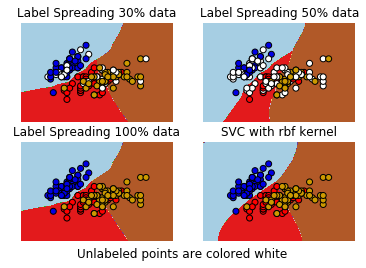

In [0]:
#sklearn의 iris 예제

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(12345)

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = .02

#타겟셋을 변환한다. 원본을 복사하여 사용
#30%를 -1로 대체한다.
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
#50%를 -1로 대체한다.
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)

rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()